In [56]:
import pandas as pd
import matplotlib
matplotlib.rcParams["font.family"] = "Arial"
import matplotlib.pyplot as plt
from matplotlib import rc
# activate latex text rendering
rc('text', usetex=False)
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

# PCA

## Load PSI matrix

In [ ]:
# Jul24
psi_matrix_df = pd.read_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/PSI_matrix_sample.txt", sep = "\t")
psi_matrix_df = psi_matrix_df.drop(columns = ["event_id"])
psi_matrix_df.head()

,pos_id,KO_F_1,KO_M_3,KO_M_4,WT_F_1,WT_F_2,WT_F_3
0,SE@GL456216.1@30699-30806@16407-31059,0.941834,0.916168,0.872123,1.000000,1.000000,0.894886
1,SE@GL456216.1@31370-31471@31127-34138,0.668998,0.932773,0.733333,0.566787,0.926702,0.790698
2,SE@GL456233.1@28308-28390@24962-28976,0.144928,0.053435,0.074733,0.152318,0.047210,0.053876
3,SE@GL456233.1@326114-326350@285515-332450,0.845161,0.859459,0.913978,0.730104,0.793358,1.000000
4,SE@JH584304.1@56986-57151@55701-58564,0.884457,0.920290,0.940334,0.921260,0.939036,1.000000


In [45]:
# mouse mESC neuronal differentiation (SRP055008)
psi_matrix_PRJNA185305_df = pd.read_csv("/rhome/naotok/bigdata/NeuronalMaturationSplicing/splicing/PRJNA185305/Shiba/results/splicing/PSI_matrix_sample.txt", sep = "\t")
psi_matrix_PRJNA185305_df = psi_matrix_PRJNA185305_df.drop(columns = ["event_id"])
# group
group_df = pd.read_csv("/rhome/naotok/NeuronalMaturationSplicing/scripts/splicing/experiment_Shiba_PRJNA185305.tsv", sep = "\t", usecols = ["sample", "group"])
group_dict = {k: v for k, v in zip(group_df["sample"], group_df["group"])}
psi_matrix_PRJNA185305_df.columns = [group_dict[x] + "_" + x if x != "pos_id" else x for x in psi_matrix_PRJNA185305_df.columns]
psi_matrix_PRJNA185305_df

,pos_id,DIV-8_SRR645824,DIV-8_SRR645826,DIV-8_SRR645828,DIV-8_SRR645830,DIV-4_SRR645833,DIV-4_SRR645835,DIV-4_SRR645837,DIV0_SRR645840,DIV0_SRR645842,...,DIV21_SRR645870,DIV28_SRR645872,DIV28_SRR645875,DIV28_SRR645877,DIV28_SRR645879,DIV1_SRR645930,DIV1_SRR645932,DIV1_SRR645934,DIV1_SRR646092,DIV7_SRR646182
0,SE@GL456233.1@272714-272993@258423-285396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.866667,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.928571,NaN,NaN,NaN
1,SE@GL456233.1@272715-272993@258423-285396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SE@JH584304.1@56986-57151@55701-58564,0.694915,0.478261,0.627451,0.442623,0.635135,0.655172,0.698795,0.759214,0.844444,...,0.549872,0.709138,0.685510,0.689630,0.746364,0.709729,0.722504,0.766355,0.773672,0.794492
3,SE@JH584304.1@58564-58835@55701-59592,0.948718,0.975309,0.944444,0.900000,0.933333,0.962963,0.940299,0.944444,0.898734,...,0.720930,0.820714,0.801047,0.801749,0.850962,0.824000,0.882122,0.866279,0.861635,0.820789
4,SE@chr10@100080857-100080940@100080130-100087347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902439,0.888889,...,1.000000,NaN,1.000000,NaN,NaN,1.000000,0.862069,1.000000,NaN,0.854545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87140,ALE@chrX@99468314-99470617@99468600-99470617,0.903226,0.866667,0.884615,0.878049,0.800000,0.800000,0.869565,0.871795,0.923077,...,0.980315,0.977011,0.971429,0.964286,0.988806,0.936047,0.965517,0.980392,0.944882,0.970060
87141,ALE@chrY@1158634-1168090@1161230-1168090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87142,ALE@chrY@90793417-90816349@90793417-90811189,0.994652,1.000000,0.984772,1.000000,1.000000,0.985714,0.990741,0.997717,0.997886,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.997222,0.996564,0.990868,1.000000,0.996942
87143,ALE@chrY@90793417-90833771@90793417-90811189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge

In [ ]:
psi_matrix_merge_df = pd.merge(psi_matrix_df, psi_matrix_PRJNA185305_df, on = "pos_id")
psi_matrix_merge_df = psi_matrix_merge_df.set_index("pos_id")

In [47]:
def mtx2pca(df, genes) -> pd.DataFrame:
    '''
    Perform PCA on the input dataframe

    Args:
    - df (pd.DataFrame): input dataframe
    - genes (int): number of highly-variable genes to calculate PCs

    Returns:
    - feature_df (pd.DataFrame): dataframe containing principal components
    - contribution_df (pd.DataFrame): dataframe containing the contribution of each principal component
    '''
    df = df.dropna()
    # Keep rows of top n highly-variable genes
    if df.shape[0] > genes:
        df = df.loc[df.var(axis=1).sort_values(ascending=False).index[:genes]]
    # Z-score normalization across samples
    normalized_df = df.T.apply(stats.zscore, ddof = 1)
    # PCA
    pca = PCA()
    pca.fit(normalized_df)
    # Feature
    feature = pca.transform(normalized_df)
    feature_df = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(feature))])
    feature_df.index = df.columns
    # Contribution
    contribution_df = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(feature))])
    return(feature_df, contribution_df)

In [48]:
feature_df, contribution_df = mtx2pca(psi_matrix_merge_df, 3000)
PC1_contribution = (contribution_df[0][0]*100).round(2)
PC2_contribution = (contribution_df[0][1]*100).round(2)
pca_df = feature_df.copy()
pca_df["group"] = pca_df.index.map(lambda x: x.split("_")[0])
pca_df["group"] = pca_df["group"].map(lambda x: x if x != "KO" else "Ptbp1 cKO").map(lambda x: "Control" if x == "WT" else x)

## Plot

In [49]:
pca_df["group"].unique()

array(['Ptbp1 cKO', 'Control', 'DIV-8', 'DIV-4', 'DIV0', 'DIV7', 'DIV16',
       'DIV21', 'DIV28', 'DIV1'], dtype=object)

In [50]:
color_palette_dict = {}
viridis = sns.color_palette("viridis", n_colors = 8).as_hex()
Set2 = sns.color_palette("Set2").as_hex()
i = 0
for group in ["DIV-8", "DIV-4", "DIV0", "DIV1", "DIV7", "DIV16", "DIV21", "DIV28"]:
    color_palette_dict[group] = viridis[i]
    i+=1
color_palette_dict["Control"] = "black"
color_palette_dict["Ptbp1 cKO"] = "red"
color_palette_dict

{'DIV-8': '#482878',
 'DIV-4': '#3e4989',
 'DIV0': '#31688e',
 'DIV1': '#26828e',
 'DIV7': '#1f9e89',
 'DIV16': '#35b779',
 'DIV21': '#6ece58',
 'DIV28': '#b5de2b',
 'Control': 'black',
 'Ptbp1 cKO': 'red'}

In [51]:
viridis

['#482878',
 '#3e4989',
 '#31688e',
 '#26828e',
 '#1f9e89',
 '#35b779',
 '#6ece58',
 '#b5de2b']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


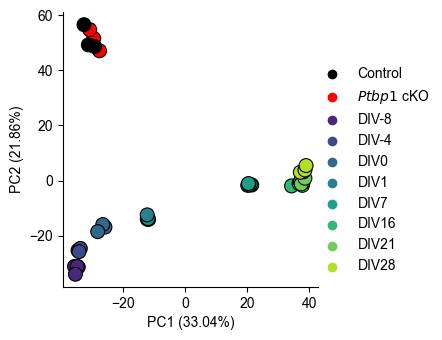

In [ ]:
g = sns.relplot(
    data = pca_df,
    x = "PC1",
    y = "PC2",
    hue = "group",
    hue_order = ["Control", "Ptbp1 cKO"] + ["DIV-8", "DIV-4", "DIV0", "DIV1", "DIV7", "DIV16", "DIV21", "DIV28"],
    s = 100,
    edgecolor = "black",
    height = 3.5,
    aspect = 1,
    palette = color_palette_dict
)
g.set_xlabels(f"PC1 ({PC1_contribution}%)")
g.set_ylabels(f"PC2 ({PC2_contribution}%)")
g._legend.set_title("")
# Italicize 'Ptbp1 cKO' in legend
for text in g._legend.texts:
    if text.get_text() == "Ptbp1 cKO":
        text.set_text(r"$\it{Ptbp1}$ cKO")  # LaTeX-style italic
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/PCA_vs_neuron_PRJNA185305.png", bbox_inches = "tight", dpi = 1000)

# Correlation of PSI

In [ ]:
DSE_path_dict = {
    "astrocyte": "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing",
    "neuron": "/rhome/naotok/bigdata/NeuronalMaturationSplicing/splicing/PRJNA185305/Shiba_DIV0vsDIV28/results/splicing"
}

DSE_set = set()
events_Shiba = ["SE", "FIVE", "THREE", "MXE", "RI", "MSE", "AFE", "ALE"]
for path in DSE_path_dict:
    for event in events_Shiba:
        tmp_df = pd.read_csv(DSE_path_dict[path] + "/PSI_" + event + ".txt", sep = "\t")
        DSE_set = DSE_set | set(tmp_df[(tmp_df["Diff events"] == "Yes") & (tmp_df["p_ttest"] < 0.05)]["pos_id"])

In [19]:
len(DSE_set)

3644

In [20]:
psi_matrix_merge_melt_df = psi_matrix_merge_df.reset_index().melt(id_vars = "pos_id", var_name = "sample", value_name = "PSI")
psi_matrix_merge_melt_df = psi_matrix_merge_melt_df[psi_matrix_merge_melt_df["pos_id"].isin(DSE_set)]
psi_matrix_merge_melt_df["group"] = psi_matrix_merge_melt_df["sample"].map(lambda x: x.split("_")[0])
psi_matrix_merge_melt_df = psi_matrix_merge_melt_df.groupby(["pos_id", "group"], as_index = False).mean()
psi_matrix_mean_df = psi_matrix_merge_melt_df.pivot(index = "pos_id", columns = "group", values = "PSI")
psi_matrix_mean_df = psi_matrix_mean_df.rename(columns = {"WT": "Control", "KO": "Ptbp1 cKO"})
psi_matrix_mean_df = psi_matrix_mean_df[["Control", "Ptbp1 cKO", "DIV0", "DIV28"]]
psi_matrix_mean_df = psi_matrix_mean_df.dropna()
psi_matrix_mean_df = psi_matrix_mean_df*100
psi_matrix_mean_df.head()

/scratch/naotok/14343570/ipykernel_1591463/3839284725.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  psi_matrix_merge_melt_df = psi_matrix_merge_melt_df.groupby(["pos_id", "group"], as_index = False).mean()


group,Control,Ptbp1 cKO,DIV0,DIV28
pos_id,,,,
AFE@chr10@116549175-116581453@116549175-116580481,100.000000,95.148177,97.810653,83.122320
AFE@chr10@120227123-120227974@120227549-120227974,91.941232,97.793149,97.778868,74.024995
AFE@chr10@12538213-12614491@12538213-12547947,68.750000,58.333333,26.090576,100.000000
AFE@chr10@128747998-128765147@128748566-128765147,43.663984,38.572716,30.567581,10.775162
AFE@chr10@60002907-60004795@60003416-60004795,87.662037,93.937622,83.703704,60.990193


In [21]:
psi_matrix_mean_df.corr(method = "spearman")

group,Control,Ptbp1 cKO,DIV0,DIV28
group,,,,
Control,1.000000,0.919828,0.788232,0.235208
Ptbp1 cKO,0.919828,1.000000,0.798081,0.238888
DIV0,0.788232,0.798081,1.000000,0.155074
DIV28,0.235208,0.238888,0.155074,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


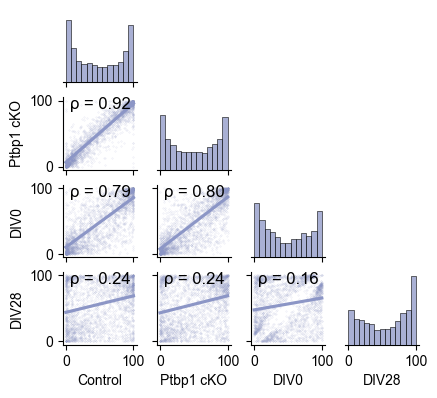

In [ ]:
g = sns.pairplot(
    data = psi_matrix_mean_df,
    kind = "reg",
    corner = True,
    plot_kws = {
        "scatter_kws": {"alpha": 0.3, "s": 0.05, "color": "#8c96c6"},
        "line_kws": {"color": "#8c96c6"}
    },
    diag_kws = {"color": "#8c96c6"},
    height = 1, aspect = 1.1
)
# Calculate and add Spearman's correlation coefficients in the same plot space
for i in range(len(g.axes)):
    for j in range(i):
        ax = g.axes[i, j]
        x = psi_matrix_mean_df.iloc[:, j]
        y = psi_matrix_mean_df.iloc[:, i]
        corr, _ = stats.spearmanr(x, y)
        ax.annotate(f"ρ = {corr:.2f}", 
                    xy=(0.1, 0.9), xycoords='axes fraction', 
                    ha='left', va='center', fontsize=12)
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/pairplot_vs_neuron_PRJNA185305.png", bbox_inches = "tight", dpi = 1000)

# dPSI of DSE in astrocyte vs. in vitro neurons

In [ ]:
events_Shiba = ["SE", "FIVE", "THREE", "MXE", "RI", "MSE", "AFE", "ALE"]
Shiba_astrocyte_df = pd.DataFrame()
DSE_astrocyte_set = set()
for event in events_Shiba:
    tmp_df = pd.read_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/PSI_" + event + ".txt", sep = "\t")
    tmp_diff = set(tmp_df[(tmp_df["Diff events"] == "Yes") & (tmp_df["p_ttest"] < 0.05)]["pos_id"])
    DSE_astrocyte_set = DSE_astrocyte_set | tmp_diff
    tmp_df["group"] = "astrocyte"
    tmp_df = tmp_df[["pos_id", "Diff events", "dPSI", "group"]]
    Shiba_astrocyte_df = tmp_df if Shiba_astrocyte_df.empty else pd.concat([Shiba_astrocyte_df, tmp_df])

In [24]:
Shiba_astrocyte_df

,pos_id,Diff events,dPSI,group
0,SE@chr10@79856504-79856534@79854721-79858752,Yes,-0.850777,astrocyte
1,SE@chr8@70599840-70599899@70599757-70600396,Yes,-0.150211,astrocyte
2,SE@chr12@111825576-111825632@111825108-111827543,Yes,0.167704,astrocyte
3,SE@chr12@111825579-111825632@111825108-111827543,Yes,0.170582,astrocyte
4,SE@chr2@152703995-152704194@152700268-152704622,Yes,0.182524,astrocyte
...,...,...,...,...
2769,ALE@chrX@7889763-7894191@7889763-7892140,No,0.000000,astrocyte
2770,ALE@chrX@7892867-7894191@7892867-7893968,No,0.000000,astrocyte
2771,ALE@chrX@8141208-8143251@8142955-8143251,No,0.000000,astrocyte
2772,ALE@chrX@95049346-95058817@95055011-95058817,No,0.000000,astrocyte


In [25]:
Shiba_Neuron_df = pd.DataFrame()
DSE_Neuron_set = set()
for event in events_Shiba:
    tmp_df = pd.read_csv("/rhome/naotok/bigdata/NeuronalMaturationSplicing/splicing/PRJNA185305/Shiba_DIV0vsDIV28/results/splicing/PSI_" + event + ".txt", sep = "\t")
    tmp_diff = set(tmp_df[(tmp_df["Diff events"] == "Yes") & ((tmp_df["p_ttest"] < 0.05))]["pos_id"])
    DSE_Neuron_set = DSE_Neuron_set | tmp_diff
    tmp_df["group"] = "Neuron"
    tmp_df = tmp_df[["pos_id", "Diff events", "dPSI", "group"]]
    Shiba_Neuron_df = tmp_df if Shiba_Neuron_df.empty else pd.concat([Shiba_Neuron_df, tmp_df])

In [26]:
DSE_astrocyte_Neuron_set = DSE_astrocyte_set | DSE_Neuron_set
Shiba_astrocyte_Neuron_df = pd.concat([Shiba_astrocyte_df, Shiba_Neuron_df])
Shiba_astrocyte_Neuron_df = Shiba_astrocyte_Neuron_df[Shiba_astrocyte_Neuron_df["pos_id"].isin(DSE_astrocyte_Neuron_set)]
Shiba_astrocyte_Neuron_pivot_df = Shiba_astrocyte_Neuron_df.pivot(index = "pos_id", columns = "group", values = "dPSI").dropna()
Shiba_astrocyte_Neuron_pivot_df = Shiba_astrocyte_Neuron_pivot_df*100
Shiba_astrocyte_Neuron_pivot_df

group,Neuron,astrocyte
pos_id,,
AFE@chr10@116549175-116581453@116549175-116580481,-14.548023,-4.545455
AFE@chr10@120227123-120227974@120227549-120227974,-24.404872,7.321652
AFE@chr10@12538213-12614491@12538213-12547947,73.913043,-3.743961
AFE@chr10@128747998-128765147@128748566-128765147,-19.554277,-15.438787
AFE@chr10@60002907-60004795@60003416-60004795,-22.133599,5.675598
...,...,...
THREE@chrX@152340393-152341540@152340380-152341540,-23.162827,-2.785614
THREE@chrX@48578556-48588703@48578529-48588703,-9.842995,-32.019850
THREE@chrX@74017511-74018130@74017430-74018130,3.921569,-13.333333


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


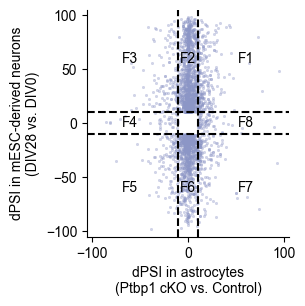

In [ ]:
g = sns.relplot(
    data = Shiba_astrocyte_Neuron_pivot_df,
    x = "astrocyte",
    y = "Neuron",
    height = 3,
    s = 4,
    edgecolor = None,
    alpha = 0.4,
    color = "#8c96c6"
)
g.set(xlim = (-105, 105), ylim = (-105, 105))
g.set_xlabels("dPSI in astrocytes\n(Ptbp1 cKO vs. Control)")
g.set_ylabels("dPSI in mESC-derived neurons\n(DIV28 vs. DIV0)")
plt.axhline(10, color = "black", ls = "--")
plt.axhline(-10, color = "black", ls = "--")
plt.axvline(10, color = "black", ls = "--")
plt.axvline(-10, color = "black", ls = "--")

# Display counts in each fraction
plt.text(60, 60, 'F1', ha='center', va='center')
plt.text(0, 60, 'F2', ha='center', va='center')
plt.text(-60, 60, 'F3', ha='center', va='center')
plt.text(-60, 0, 'F4', ha='center', va='center')
plt.text(-60, -60, 'F5', ha='center', va='center')
plt.text(0, -60, 'F6', ha='center', va='center')
plt.text(60, -60, 'F7', ha='center', va='center')
plt.text(60, 0, 'F8', ha='center', va='center')

plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/relplot_vs_vitro_DIV0vsDIV28_dPSI.png", bbox_inches = "tight", dpi = 1000)

In [21]:
def dPSI_grouping(x):
    if x["astrocyte"] > 10:
        if x["Neuron"] > 10:
            group = "F1"
        elif x["Neuron"] > -10:
            group = "F8"
        elif x["Neuron"] < -10:
            group = "F7"
    elif x["astrocyte"] < -10:
        if x["Neuron"] > 10:
            group = "F3"
        elif x["Neuron"] > -10:
            group = "F4"
        elif x["Neuron"] < -10:
            group = "F5"
    else:
        if x["Neuron"] > 10:
            group = "F2"
        elif x["Neuron"] < -10:
            group = "F6"
    return(group)

Shiba_astrocyte_Neuron_pivot_df["group"] = Shiba_astrocyte_Neuron_pivot_df.apply(dPSI_grouping, axis = 1)

In [22]:
Shiba_astrocyte_Neuron_group_size_df = Shiba_astrocyte_Neuron_pivot_df.groupby("group", as_index = False).size()
Shiba_astrocyte_Neuron_group_size_df["fraction"] = Shiba_astrocyte_Neuron_group_size_df["size"].map(lambda x: round(100*(x / Shiba_astrocyte_Neuron_pivot_df.shape[0]), 2))
Shiba_astrocyte_Neuron_group_size_df

,group,size,fraction
0,F1,254,9.37
1,F2,1081,39.89
2,F3,146,5.39
3,F4,43,1.59
4,F5,127,4.69
5,F6,825,30.44
6,F7,160,5.90
7,F8,74,2.73


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


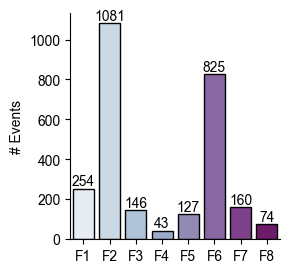

In [ ]:
g = sns.catplot(
    data = Shiba_astrocyte_Neuron_group_size_df,
    x = "group",
    y = "size",
    kind = "bar",
    palette = "BuPu",
    height = 3,
    linewidth = 1,
    edgecolor = "black"
)
g.set_xlabels("")
g.set_ylabels("# Events")
# Add text on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-position of the text
            p.get_height(),  # y-position of the text
            int(p.get_height()),  # text to display
            ha="center",  # horizontal alignment
            va="bottom"   # vertical alignment
        )
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/catplot_vs_vitro_DIV0vsDIV28_size.png", bbox_inches = "tight", dpi = 1000)